# Part A - Question 2

**Supervised Learning Algorithms - KNN:**  Build a KNN model for predicting if a person will have diabetes or not with a high accuracy score. Perform some appropriate Pre-Processing steps on the given dataset for better results. Implement the KNN algorithm on your own. Try other possible processes that can be done to dataset and tuning the model to increase accuracy such as Increase K value, Normalization and Different Distance Metrics. Perform Feature Ablation Study. Additional Tries: Weight the features before doing KNN prediction.

## Hand code

In [77]:
import numpy as np
from scipy.stats import mode

class KNNClassifier:
    def euclidean(self,v1,v2):
        dist = np.sqrt(np.sum((v1-v2)**2))
        return dist
    
    def fit(self,X_train,Y_train):
        self.X_train = np.array(X_train)
        self.Y_train = np.array(Y_train)

    def predict(self,X_test,k=3):
        predicted_outcomes = []
        for v2 in X_test:
            distances = np.array([self.euclidean(v1,v2) for v1 in self.X_train])
            dist = np.argsort(distances)[:k]
            labels = np.array([self.Y_train[a] for a in dist])
            label = mode(labels,keepdims=False)[0]
            predicted_outcomes.append(label)
        return predicted_outcomes   
    

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')
df.dropna(inplace=True)
X=pd.DataFrame(StandardScaler().fit_transform(df.drop(['Outcome'],axis=1)),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [79]:
knn = KNNClassifier()
knn.fit(X_train,y_train)

In [80]:

y_pred=knn.predict(X_test.values)

0.7114093959731543


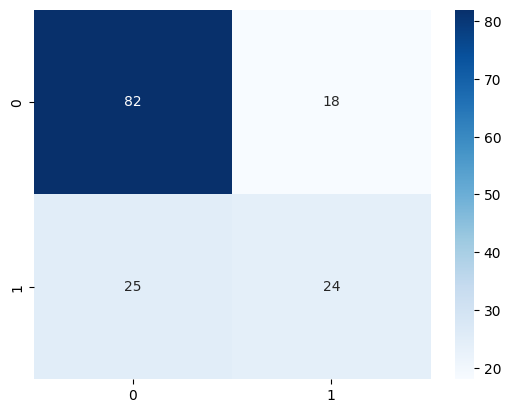

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap='Blues',annot=True)
print(accuracy_score(y_test, y_pred))

In [82]:
accuracy_scores = []
for k in range(1,20):
  predicted_vals = knn.predict(np.array(X_test), k)
  accuracy = accuracy_score(y_test, predicted_vals)
  accuracy_scores.append(accuracy)
  print("For k = {}\n".format(k), accuracy)

For k = 1
 0.7651006711409396
For k = 2
 0.7248322147651006
For k = 3
 0.7114093959731543
For k = 4
 0.7315436241610739
For k = 5
 0.7181208053691275
For k = 6
 0.7248322147651006
For k = 7
 0.7248322147651006
For k = 8
 0.7516778523489933
For k = 9
 0.7583892617449665
For k = 10
 0.7516778523489933
For k = 11
 0.7583892617449665
For k = 12
 0.7449664429530202
For k = 13
 0.7449664429530202
For k = 14
 0.7651006711409396
For k = 15
 0.7718120805369127
For k = 16
 0.7583892617449665
For k = 17
 0.7516778523489933
For k = 18
 0.7449664429530202
For k = 19
 0.7583892617449665


Text(0, 0.5, 'Accuracy')

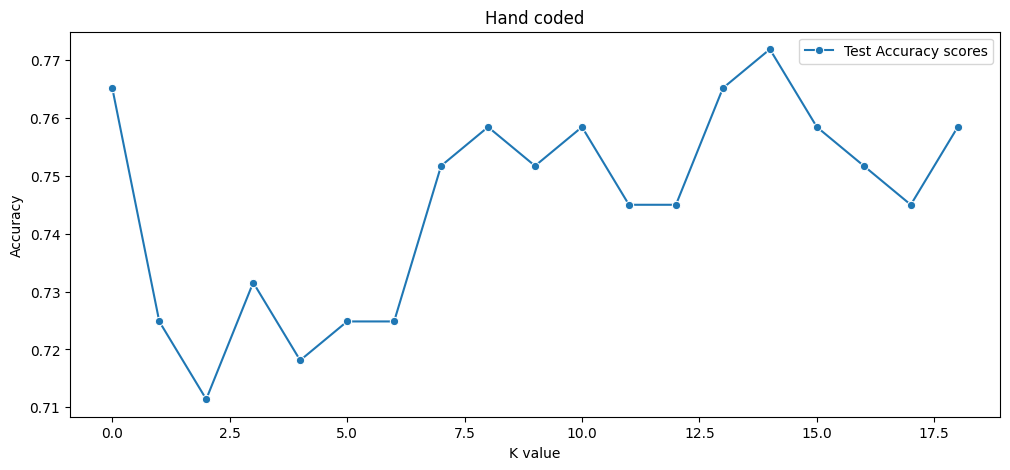

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.lineplot(accuracy_scores,marker='o',label='Test Accuracy scores')
plt.title("Hand coded")
plt.xlabel("K value")
plt.ylabel("Accuracy")

## InBuilt

In [101]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_scores_inbuilt = []
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    accuracy_scores_inbuilt.append(accuracy)
    print("For k = {}\n".format(k),accuracy)

For k = 1
 0.7651006711409396
For k = 2
 0.7248322147651006
For k = 3
 0.7114093959731543
For k = 4
 0.7315436241610739
For k = 5
 0.7181208053691275
For k = 6
 0.7248322147651006
For k = 7
 0.7248322147651006
For k = 8
 0.7516778523489933
For k = 9
 0.7583892617449665
For k = 10
 0.7516778523489933
For k = 11
 0.7583892617449665
For k = 12
 0.7449664429530202
For k = 13
 0.7449664429530202
For k = 14
 0.7651006711409396
For k = 15
 0.7718120805369127
For k = 16
 0.7583892617449665
For k = 17
 0.7516778523489933
For k = 18
 0.7449664429530202
For k = 19
 0.7583892617449665


Text(0, 0.5, 'Accuracy')

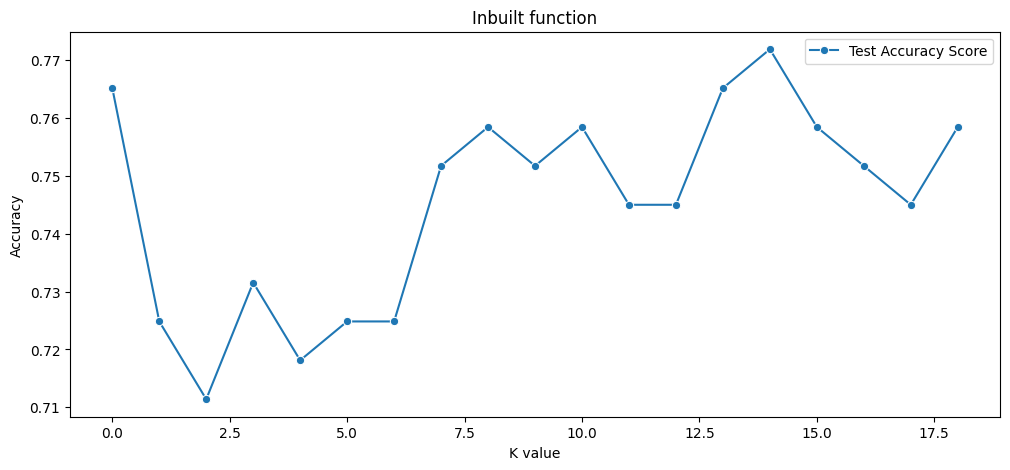

In [106]:
plt.figure(figsize=(12,5))
sns.lineplot(accuracy_scores_inbuilt,marker='o',label='Test Accuracy Score')
plt.title("Inbuilt function")
plt.xlabel("K value")
plt.ylabel("Accuracy")
